__This notebook analyzes the socioeconomic indicators in Chicago, 2008 – 2012 released by the Chicago city portal and could be downloaded from the link below__
[City of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01)

This example is a part of "Databases and SQL for Data Science" course offered by Coursera.org 
The skeleton of the solution is partly provided in the course.  

In [5]:
# loading ipython sql extension
%reload_ext sql

In [6]:
# insert the location of your connection string as below
%sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL

In [123]:
df_sql = %sql select * from  socioeconomic_indicator
df = df_sql.DataFrame()

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


In [128]:
# How many rows are in the dataset?
%sql select count(*)  as count_number_of_rows from socioeconomic_indicator

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


count_number_of_rows
78


In [132]:
# How many community areas in Chicago have a hardship index greater than 50.0?
%sql select count(*) as count from socioeconomic_indicator where hardship_index>50

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


COUNT
38


In [137]:
# What is the maximum value of hardship index in this dataset?¶
%sql select max(hardship_index) as max from socioeconomic_indicator

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


MAX
98


In [141]:
# Which community area which has the highest hardship index?
%sql select * from socioeconomic_indicator where hardship_index in (select max(hardship_index) from socioeconomic_indicator)

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
54,Riverdale,5.8,56.5,34.6,27.5,51.5,8201,98


In [144]:
# Which Chicago community areas have per-capita incomes greater than $60,000?
%sql select community_area_name , per_capita_income_ from socioeconomic_indicator where per_capita_income_>60000

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


community_area_name,per_capita_income_
Lake View,60058
Lincoln Park,71551
Near North Side,88669
Loop,65526


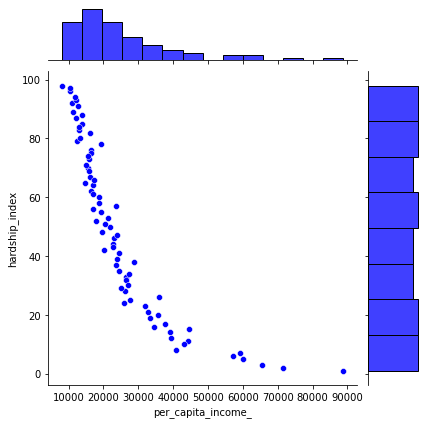

In [155]:
# Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.jointplot(x = 'per_capita_income_' , y = 'hardship_index', data = df , color='blue')
# there is no level of nonlinear correlation between the two variables Also it shows that after around 45000 per capital income
# the rate of change in the hardship_index is insignificant. Also, the majority fo the data belongs to the commmunities with 
# income per capital less than 45k.

In [162]:
%sql select * from socioeconomic_indicator limit  1

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39


<AxesSubplot:xlabel='percent_of_housing_crowded', ylabel='hardship_index'>

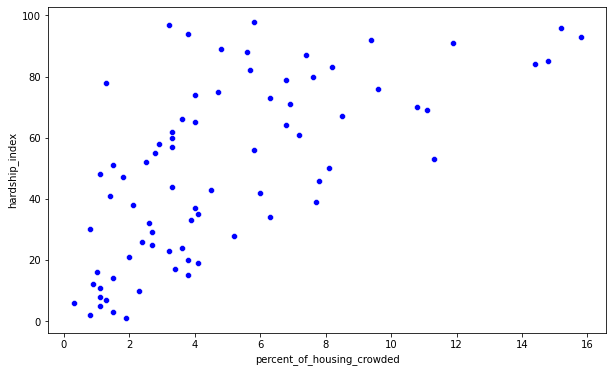

In [199]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = 'percent_of_housing_crowded' , y = 'hardship_index', ax=ax, data = df , color='blue')